In [1]:
import scipy as sp
import numpy as np
import BATT as b
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
from scipy.integrate import solve_bvp

%matplotlib inline

In [2]:
# initializing constants
K = 0.06    #liquid conductivity
s = 20.     #solid conductivity
a = 23300.  #area/volume
ac = 0.5    #alpha cathode
aa = 0.5    #alpha anode
io = 2e-7   #exchange current density
L = 0.5      #length
n = 1       #exchanged electrons
F = 96485   #Faraday's constant
R = 8.314   #gas constant
T = 298     #temperature
I = 0.1     #total current density
L_sep = 0.1 #length of separator
Resist_sep = 1 #resistance of separator per length

In [72]:
Vwall1 = 1
Vwall2 = 1

def BCCath(ya, yb):
    return (yb[0] - I), (ya[1] - I), ya[3] - Vwall_2, yb[1]
#     return (ya[0] - I), yb[0], (yb[1] - I), ya[2]# (yb[4] - I), ya[4], (ya[5] - I), ya[2], (ya[6])

def BCAn(ya, yb):
    return (yb[1] - I), (ya[0] - I), yb[3], yb[0]
#     return (ya[0] - I), yb[0], (yb[1] - I), ya[2]# (yb[4] - I), ya[4], (ya[5] - I), ya[2], (ya[6])
      
def TafelCath(x, IV):
    """
    uses Tafel kinetics
    """
    is_p, ie_p, Vs_p, Ve_p = IV
    #n represents anode attributes, p represents cathode attributes
    
    taff_p = -ac*n*F/(R*T)*(Vs_p - Ve_p)
    die_p = -a*io*np.exp(taff_p)
    #Kinetics
    
    dis_p = -die_p
    #charge neutrality
    
    dVs_p = -is_p/s
    #solids ohms law
    
    dVe_p = -ie_p/K
    #liquids ohms law

    return dis_p, die_p, dVs_p, dVe_p

def TafelAn(x, IV):
    """
    uses Tafel kinetics
    """
    
    is_n, ie_n, Vs_n, Ve_n = IV
    #n represents anode attributes, p represents cathode attributes
    
    taff_n = aa*n*F/(R*T)*(Vs_n - Ve_n)
    die_n = a*io*np.exp(taff_n)
    #Kinetics
    
    dis_n = -die_n
    #charge neutrality
    
    dVs_n = -is_n/s
    #solids ohms law
    
    dVe_n = -ie_n/K
    #liquids ohms law

    return dis_n, die_n, dVs_n, dVe_n

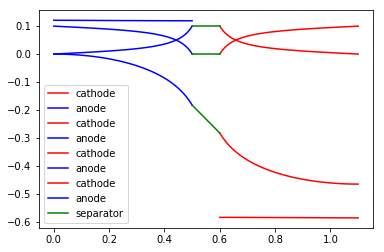

In [4]:
N = 10
N_sep = 20
x_cath = np.linspace(L + L_sep, 2*L + L_sep, N)
x_an = np.linspace(0, L, N)
y = np.zeros([4, N])

x_plot_cath = np.linspace(L + L_sep, L_sep + 2*L, 100)
x_plot_an = np.linspace(0, L, 100)

An = solve_bvp(TafelAn, BCAn, x_an, y)
Vwall_1 = An.sol(x_plot_an)[3][-1]

x_sep = np.linspace(L, L + L_sep, N_sep)
is_sep = np.ones(N_sep) * An.sol(x_plot_an)[0][-1]
ie_sep = np.ones(N_sep) * An.sol(x_plot_an)[1][-1]
Ve_sep = np.zeros(N_sep)
Ve_sep[0] = Vwall_1
for i in range(N_sep):
    Ve_sep[i] = Vwall_1 - (x_sep[i] - L) * Resist_sep

Vwall_2 = Ve_sep[-1]
Cath = solve_bvp(TafelCath, BCCath, x_cath, y)
# Ta_IV = solve_bvp(Tafelfunc_a, BC_a, x, y)
# Tc_IV = solve_bvp(Tafelfunc_c, BC_c, x, y)

for i in range(4):
    plt.plot(x_plot_cath, Cath.sol(x_plot_cath)[i], color = 'r', label = 'cathode')
    plt.plot(x_plot_an, An.sol(x_plot_an)[i], color = 'b', label = 'anode')

plt.plot(x_sep, Ve_sep, color = 'g')
plt.plot(x_sep, is_sep, color = 'g')
plt.plot(x_sep, ie_sep, color = 'g', label = 'separator')

plt.legend(loc = 'best')

In [73]:
def USS_TafelAn(x, IV):
    """
    uses Tafel kinetics
    """
    
    is_n, ie_n, Vs_n, Ve_n = IV
    #n represents anode attributes, p represents cathode attributes
    
    x_data = i_lim_x.copy() #np.linspace(0, L, 10)
    y_data = i_lim.copy()   #np.array([1,1,1,1,1,1,1,1,1,1])
#     print(x_data, y_data)
    f = sp.interpolate.interp1d(x_data, y_data)
    die_n_lim = f(x)
#     print(die_n_lim)
    
    taff_n = aa*n*F/(R*T)*(Vs_n - Ve_n)
    taff_c = -ac*n*F/(R*T)*(Vs_n - Ve_n)
    die_n = (np.exp(taff_n)-np.exp(taff_c))/(1/(a*io)+(np.exp(taff_n)-np.exp(taff_c))/die_n_lim)
    #print(die_n)
    #Kinetics
    
    dis_n = -die_n
    #charge neutrality
    
    dVs_n = -is_n/s
    #solids ohms law
    
    dVe_n = -ie_n/K
    #liquids ohms law

    return dis_n, die_n, dVs_n, dVe_n

In [74]:
coulomb_density = 5.03/86.9368 * F
ro = 0.001
print(coulomb_density) #C/cm^3

5582.440922601246


In [110]:
N = 10
N_sep = 20
x_cath = np.linspace(L + L_sep, 2*L + L_sep, N)
x_an = np.linspace(0, L, N)
y = np.zeros([4, N])
i_lim_x = np.linspace(0,L,1000)
i_lim = np.ones(i_lim_x.size)

x_plot_cath = np.linspace(L + L_sep, L_sep + 2*L, 1000)
x_plot_an = np.linspace(0, L, 1000)

# An = solve_bvp(USS_TafelAn, BCAn, x_an, y)

holder = []

for i in range(290):
    #print(i_lim)
    An = solve_bvp(USS_TafelAn, BCAn, x_an, y) #An[0] = is_n, An[1] = ie_n, An[2] = Vs_n, An[3] = Ve_n
    IV = An.sol(i_lim_x)
    
    taff_n = aa*n*F/(R*T)*(IV[2] - IV[3])
    taff_c = -ac*n*F/(R*T)*(IV[2] - IV[3])
    die_n = (np.exp(taff_n)-np.exp(taff_c))/(1/(a*io)+(np.exp(taff_n)-np.exp(taff_c))/i_lim) 
    
    i_lim = i_lim - die_n * .01
#     print(i_lim)

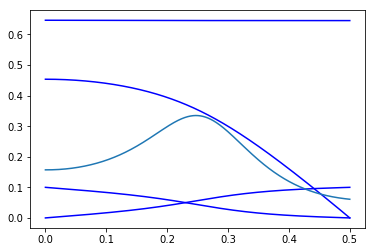

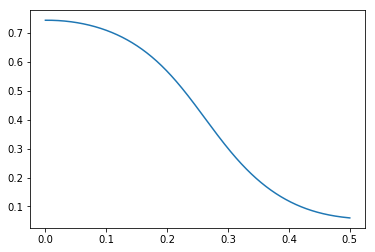

In [112]:
for i in range(4):
    plt.plot(x_plot_an, An.sol(x_plot_an)[i], color = 'b', label = 'anode')

plt.plot(i_lim_x, die_n)
plt.show()
plt.figure(1)
plt.plot(i_lim_x, i_lim)


In [98]:
# An = solve_bvp(USS_TafelAn, BCAn, x_an, y) #An[0] = is_n, An[1] = ie_n, An[2] = Vs_n, An[3] = Ve_n
# IV = An.sol(i_lim_x)

# taff_n = aa*n*F/(R*T)*(IV[2] - IV[3])
# taff_c = -ac*n*F/(R*T)*(IV[2] - IV[3])
# die_n = (np.exp(taff_n)-np.exp(taff_c))/(1/(a*io)+(np.exp(taff_n)-np.exp(taff_c))/i_lim) 

i_lim = i_lim + die_n * .01

In [108]:
print(IV[2] - IV[3], taff_n, taff_c, np.exp(taff_n), np.exp(taff_c), die_n)

[ -3.41612007e-01  -3.41612556e-01  -3.41609198e-01  -3.41601931e-01
  -3.41590751e-01  -3.41575658e-01  -3.41556649e-01  -3.41533722e-01
  -3.41506875e-01  -3.41476106e-01  -3.41441413e-01  -3.41402794e-01
  -3.41360246e-01  -3.41313769e-01  -3.41263359e-01  -3.41209015e-01
  -3.41150734e-01  -3.41088515e-01  -3.41022355e-01  -3.40952253e-01
  -3.40878205e-01  -3.40800212e-01  -3.40718269e-01  -3.40632375e-01
  -3.40542529e-01  -3.40448728e-01  -3.40350969e-01  -3.40249251e-01
  -3.40143573e-01  -3.40033931e-01  -3.39920323e-01  -3.39802749e-01
  -3.39681204e-01  -3.39555689e-01  -3.39426200e-01  -3.39292735e-01
  -3.39155292e-01  -3.39013870e-01  -3.38868466e-01  -3.38719078e-01
  -3.38565704e-01  -3.38408343e-01  -3.38246991e-01  -3.38081647e-01
  -3.37912309e-01  -3.37738975e-01  -3.37561642e-01  -3.37380309e-01
  -3.37194974e-01  -3.37005634e-01  -3.36812287e-01  -3.36614932e-01
  -3.36413567e-01  -3.36208188e-01  -3.35998795e-01  -3.35785385e-01
  -3.35567955e-01  -3.35346492e-01

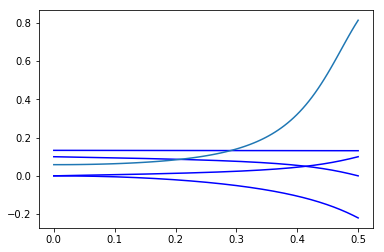

In [12]:
i_lim_x = np.linspace(0,L,100)
i_lim = np.ones(i_lim_x.size)
An = solve_bvp(USS_TafelAn, BCAn, x_an, y)

IV = An.sol(i_lim_x)
    
taff_n = aa*n*F/(R*T)*(IV[2] - IV[3])
taff_c = -ac*n*F/(R*T)*(IV[2] - IV[3])
die_n = (np.exp(taff_n)-np.exp(taff_c))/(1/(a*io)+(np.exp(taff_n)-np.exp(taff_c))/i_lim) 
    
for i in range(4):
    plt.plot(x_plot_an, An.sol(x_plot_an)[i], color = 'b', label = 'anode')
plt.plot(i_lim_x, die_n)
#plt.plot(i_lim_x, zprime)

In [42]:
print(aa*n*F/R/T)

19.471684374863777


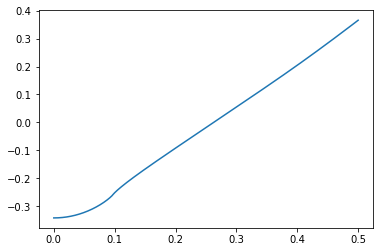

In [109]:
plt.plot(i_lim_x, IV[2] - IV[3])